# Visualize covariance matrices

__last update__: 26/04/22

In [4]:
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import pickle as pkl
import corner
import seaborn as sns # for nicer colors on the plot
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('image', interpolation='none')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
from matplotlib.colors import LogNorm, SymLogNorm, TwoSlopeNorm

from herculens.Parameters.parameters import Parameters
from herculens.Util.plot_util import nice_colorbar, nice_colorbar_residuals


In [5]:
SAVE_FIGURES = False

# Factor of pixel scale for the potential grid
potential_pixel_scale = 3

# What results (stored in fits files) do consider
#choice_model = f'sumplot-dark_halo-scale_{potential_pixel_scale}-smooth_source.pkl'
#choice_model = f'sumplot-discyness-scale_{potential_pixel_scale}-smooth_source.pkl'
choice_model = f'sumplot-real-dark_halo-scale_{potential_pixel_scale}-smooth_source-init_from_smooth.pkl'

## Load samples and parameters info

In [6]:
def get_covariance_matrices(filename):
    with open(os.path.join('results', filename), 'rb') as f:
        content = pkl.load(f)
        fisher_matrix_full = content[8]
        cov_matrix_pixpot = content[9]
        cov_matrix_lenssrc = content[10]
        #input_values_lenssrc = content[11]
        labels_lenssrc = content[13]
        
    return (fisher_matrix_full, cov_matrix_pixpot, cov_matrix_lenssrc), labels_lenssrc#, input_values_lenssrc

In [7]:
cov_matrices, labels_lenssrc = get_covariance_matrices(choice_model)
#print(cov_matrices[0].shape)
print(cov_matrices[1].shape)
print(cov_matrices[2].shape)
print(labels_lenssrc)

(1089,)
(12, 12)
['theta_E', 'e1', 'e2', 'gamma1', 'gamma2', 'amp', 'R_sersic', 'n_sersic', 'e1', 'e2', 'center_x', 'center_y']


In [8]:
# convert names to LaTeX symbols
labels_latex = [Parameters.name2latex(label) for label in labels_lenssrc]

# just replace some symbols with a better name
for l in range(len(labels_latex)):
    if labels_latex[l] == r"$A$":
        labels_latex[l] = "$I_{\\rm Sersic}$"
    elif labels_latex[l] == r"$R_{\rm Sersic}$":
        labels_latex[l] = r"$r_{\rm eff}$"
    elif labels_latex[l] == r"$x_0$":
        labels_latex[l] = r"$x_{s}$"
    elif labels_latex[l] == r"$y_0$":
        labels_latex[l] = r"$y_{s}$"
    elif labels_latex[l] == r"$e_1$":
        if l > len(labels_latex)//2:
            labels_latex[l] = r"$e_{1,s}$"
        else:
            labels_latex[l] = r"$e_{1,\psi}$"
    elif labels_latex[l] == r"$e_2$":
        if l > len(labels_latex)//2:
            labels_latex[l] = r"$e_{2,s}$"
        else:
            labels_latex[l] = r"$e_{2,\psi}$"
            
print(labels_latex)

['$\\theta_{\\rm E}$', '$e_{1,\\psi}$', '$e_{2,\\psi}$', '$\\gamma_{\\rm 1, ext}$', '$\\gamma_{\\rm 2, ext}$', '$I_{\\rm Sersic}$', '$r_{\\rm eff}$', '$n_{\\rm Sersic}$', '$e_{1,s}$', '$e_{2,s}$', '$x_{s}$', '$y_{s}$']


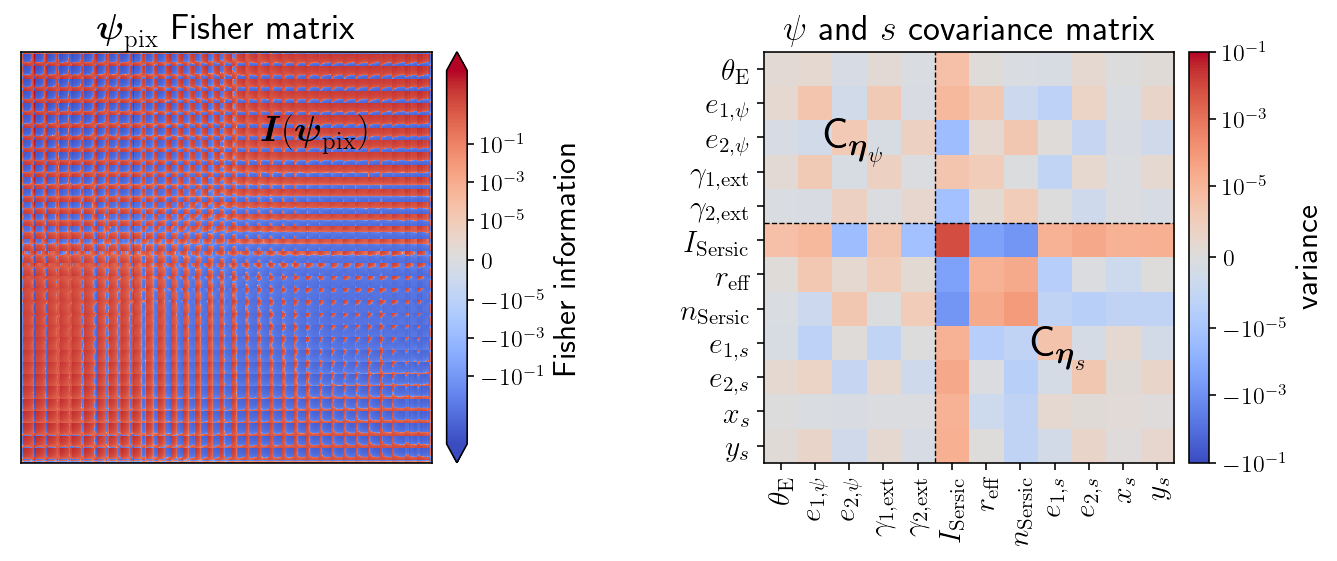

In [70]:
vmax = 1e-1
vmin = -vmax
cmap = 'coolwarm'


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
ax = axes[0]
ax.set_title(r"$\boldsymbol{\psi}_{\rm pix}$ Fisher matrix", fontsize=18)
#im = ax.imshow(cov_matrices[0], origin='upper', cmap=cmap, norm=SymLogNorm(linthresh=1e-6, 
#                                                                            linscale=1,
#                                                                            vmin=vmin, vmax=vmax))
im = ax.imshow(np.linalg.inv(cov_matrices[0]), origin='upper', cmap=cmap, norm=SymLogNorm(linthresh=1e-6, 
                                                                            linscale=1))
im.set_rasterized(True)
cb = nice_colorbar_residuals(im, cov_matrices[0], vmin=vmin, vmax=vmax, size='5%', 
                             colorbar_kwargs={'ticks': [-1e-1, -1e-3, -1e-5, 0, +1e-5, +1e-3, +1e-1]},
                             label=r"Fisher information", fontsize=16)
cb.ax.tick_params(labelsize=12)
ax.text(0.85, 0.85, r"$\boldsymbol{I}(\boldsymbol{\psi}_{\rm pix})$", fontsize=18,
        ha='right', va='top', transform=ax.transAxes)

ax = axes[1]
ax.set_title(r"$\psi$ and $s$ covariance matrix", fontsize=18)
ax.set_xticks(range(len(labels_lenssrc)))
ax.set_xticklabels(labels_latex, rotation=90, fontsize=15)
ax.set_yticks(range(len(labels_lenssrc)))
ax.set_yticklabels(labels_latex, rotation=0, fontsize=15)
im = ax.imshow(cov_matrices[2], origin='upper', cmap=cmap, norm=SymLogNorm(linthresh=1e-6, 
                                                                            linscale=1,
                                                                            vmin=vmin, vmax=vmax))
im.set_rasterized(True)
ax.axhline(4.5, linewidth=0.7, color='black', linestyle='--')
ax.axvline(4.5, linewidth=0.7, color='black', linestyle='--')
ax.text(0.22, 0.78, r"$\mathsf{C}_{\boldsymbol{\eta}_\psi}$", fontsize=22,
        ha='center', va='center', transform=ax.transAxes)
ax.text(0.72, 0.28, r"$\mathsf{C}_{\boldsymbol{\eta}_s}$", fontsize=22,
        ha='center', va='center', transform=ax.transAxes)
cb = nice_colorbar_residuals(im, cov_matrices[2], vmin=vmin, vmax=vmax, size='5%',
                             colorbar_kwargs={'ticks': [-1e-1, -1e-3, -1e-5, 0, +1e-5, +1e-3, +1e-1]},
                             label=r"variance", fontsize=16)
cb.ax.tick_params(labelsize=12)

fig.tight_layout()
plt.show()

(1101, 1101) -20937106.0 42064148.0


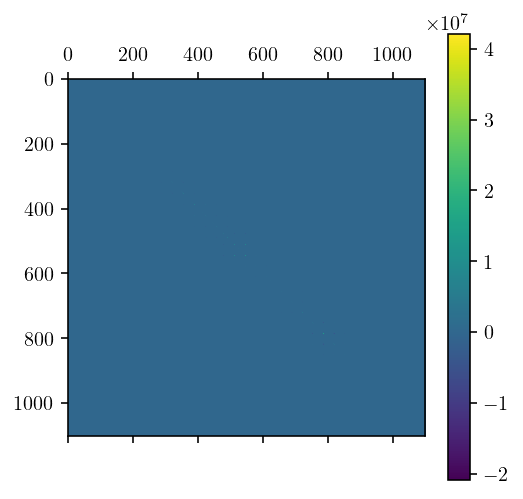

In [10]:
fim = cov_matrices[0]
print(fim.shape, fim.min(), fim.max())

plt.matshow(fim)
plt.colorbar()
plt.show()

(1101, 1101) -365.03717 771.8775


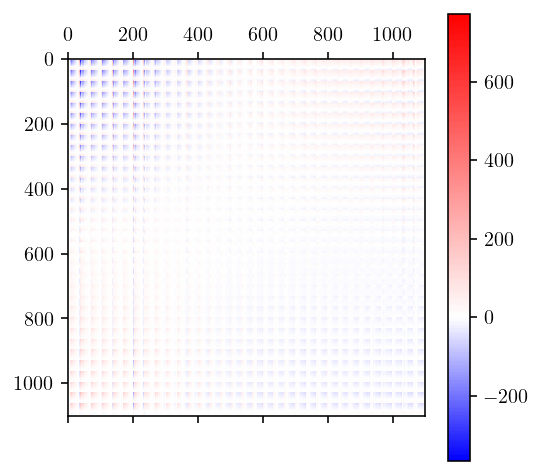

In [68]:
fim_inv = np.linalg.inv(fim)
print(fim_inv.shape, fim_inv.min(), fim_inv.max())

plt.matshow(fim_inv, norm=TwoSlopeNorm(0), cmap='bwr')
plt.colorbar()
plt.show()

(1089,) -299.97757 80.60959


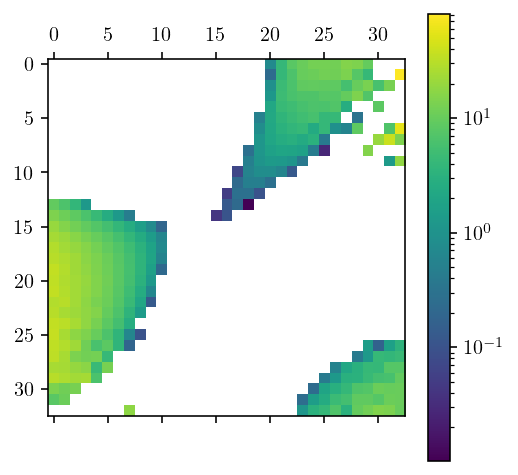

In [42]:
fim_inv_diag_pixpot = np.diag(fim_inv[5:-7, 5:-7])
print(fim_inv_diag_pixpot.shape, fim_inv_diag_pixpot.min(), fim_inv_diag_pixpot.max())

fim_inv_diag_pixpot_pos = np.copy(fim_inv_diag_pixpot)
fim_inv_diag_pixpot_pos[fim_inv_diag_pixpot < 0] = 1e-20

plt.matshow(fim_inv_diag_pixpot.reshape(33, 33), norm=LogNorm())
plt.colorbar()
plt.show()

In [74]:
covdata1, _ = get_covariance_matrices('sumplot-real-dark_halo-scale_3-smooth_source.pkl')
covdata2, _ = get_covariance_matrices('sumplot-real-dark_halo-scale_3-smooth_source-MCMC.pkl')
covdata3, _ = get_covariance_matrices('sumplot-ideal-dark_halo-scale_3-smooth_source.pkl')

In [78]:
test_cov = np.linalg.inv(covdata3[2])
print(np.diag(test_cov[:5, :5]))

plt.figure(figsize=(20, 20))
plt.imshow(test_cov, cmap='seismic', norm=TwoSlopeNorm(0), origin='upper')
plt.colorbar()

(None, array([ 0.10258153,  0.18239042,  0.08537822, ...,  0.33763918,
       -0.18291946, -0.05463834], dtype=float32), None)


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

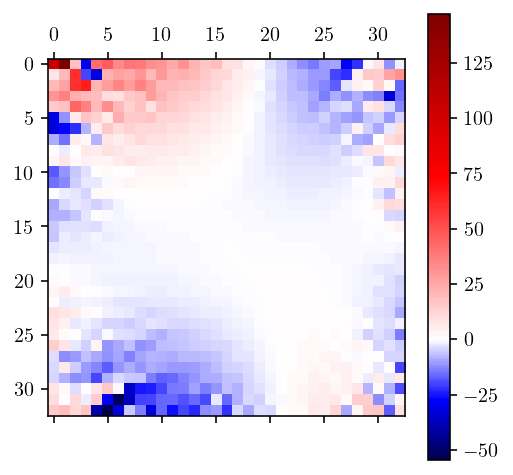

In [66]:
print(np.diag(test_cov[5:-7, 5:-7]))

plt.matshow(np.diag(test_cov[5:-7, 5:-7]).reshape(33, 33), cmap='seismic', norm=TwoSlopeNorm(0))
plt.colorbar()

-0.0007147778 0.007440594
-0.0011251920363282198 0.01159394397841673
[2.5352603e-07 2.2160361e-06 1.3968222e-06 7.5532506e-07 4.2981122e-07
 7.4405940e-03 1.5115267e-05 7.8414734e-05 2.7223055e-06 1.8809346e-06
 2.0358490e-07 4.3550574e-07]


/Users/aymericg/anaconda3/envs/py3jax/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


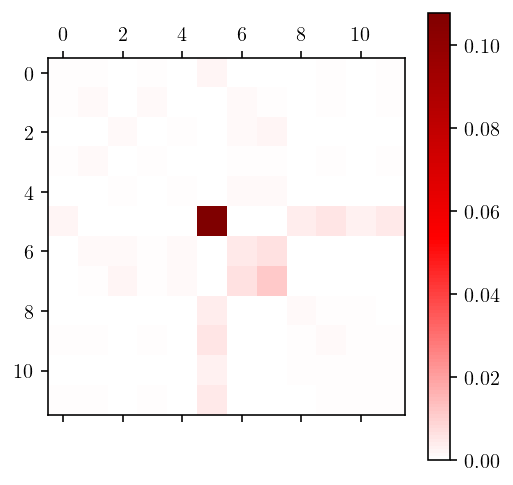

In [53]:
print(covdata1[2].min(), covdata1[2].max())
print(covdata2[2].min(), covdata2[2].max())
print(np.diag(covdata1[2]))

plt.matshow(np.sqrt(covdata2[2]), cmap='seismic', norm=TwoSlopeNorm(0))
plt.colorbar()

In [7]:
if SAVE_FIGURES:
    figure_dir = os.path.join('figures')
    figure_name = 'fisher_cov_matrices.pdf'
    fig.savefig(os.path.join(figure_dir, figure_name), bbox_inches='tight', dpi=300)